# 데이터 주요 특징 시각화

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('K-League-data.csv')
df = df.drop(columns=df.columns[0])
print(df.head())

   Rnd.        대회   H/A  득점  도움  슈팅  유효 슈팅  블락된슈팅  벗어난슈팅  PA내 슈팅  ...  경고  퇴장  \
0     1  대구vs수원FC  HOME   1   1  13      4      2      7       5  ...   1   0   
1     1    대구vs서울  HOME   0   0  10      1      3      6       7  ...   4   0   
2     1    제주vs포항  HOME   0   0   9      1      3      5       5  ...   2   0   
3     1    서울vs인천  HOME   2   1  13      7      2      4       7  ...   3   0   
4     1    포항vs대구  AWAY   2   1   9      4      3      2       6  ...   3   0   

      기준    시즌  경기결과  소속 선수 수  평균 나이  용병 수  평균 가치   총 가치  
0  daegu  2021     D       42   22.9     5  279.0  11.70  
1  daegu  2022     L       43   22.6     6  228.0   9.83  
2   jeju  2022     L       37   24.2     2  328.0  12.13  
3  seoul  2023     W       42   25.4     6  358.0  15.05  
4  daegu  2023     L       41   24.2     5  254.0  10.40  

[5 rows x 52 columns]


### 2021 ~ 2023 시즌 동안의 참여한 팀과 그 경기수 시각화

- 대구, 강원, 인천, 제주, 전북, 포항, 서울, 수원, 수원FC, 울산은 3시즌동안 강등 X

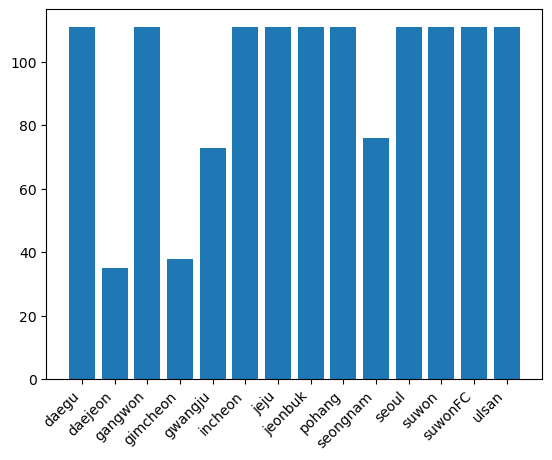

In [107]:
# 2021 ~ 2023 시즌 동안의 참여한 팀과 그 경기수 시각화

x = sorted(list(set(df['기준'].values)))
y = df['기준'].value_counts().sort_index()

plt.bar(x,y)
plt.xticks(rotation=45, ha='right') 
plt.show()


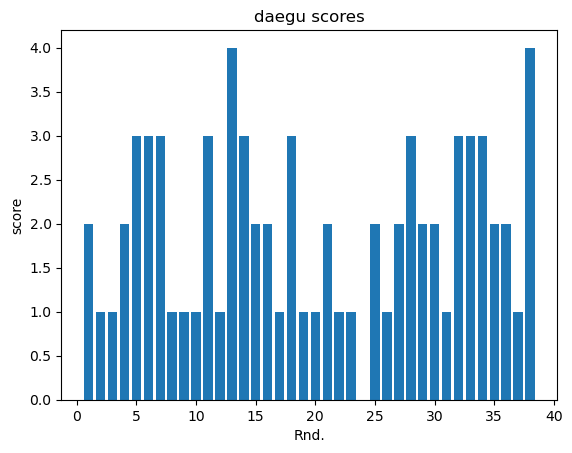

In [110]:
team_name = 'daegu'
team_df = df[df['기준'] == team_name]
plt.bar(team_df['Rnd.'], team_df['득점'])
plt.title(f'{team_name} scores')
plt.xlabel('Rnd.')
plt.ylabel('score')
plt.show()

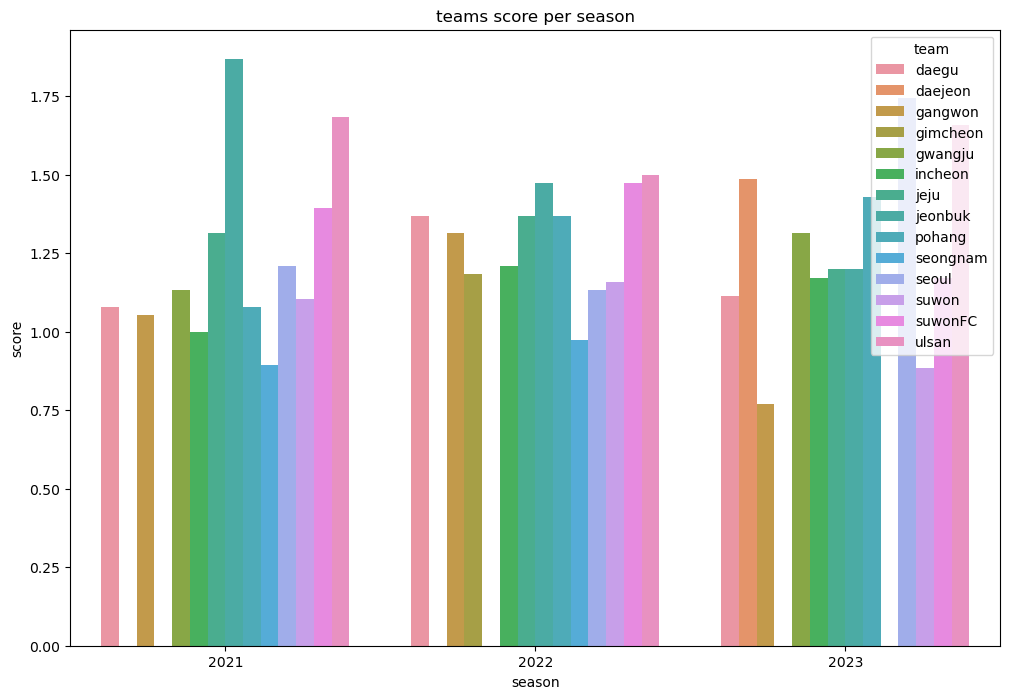

In [111]:
# 팀별 시즌별 득점 데이터 추출
team_season_goals = df.groupby(['기준', '시즌'])['득점'].mean().reset_index()

# Seaborn을 사용한 시즌별 평균득점 수 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='득점', hue='기준', data=team_season_goals)
plt.title('teams score per season')
plt.xlabel('season')
plt.ylabel('score')
plt.legend(title='team', loc='upper right')
plt.show()


c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.pr

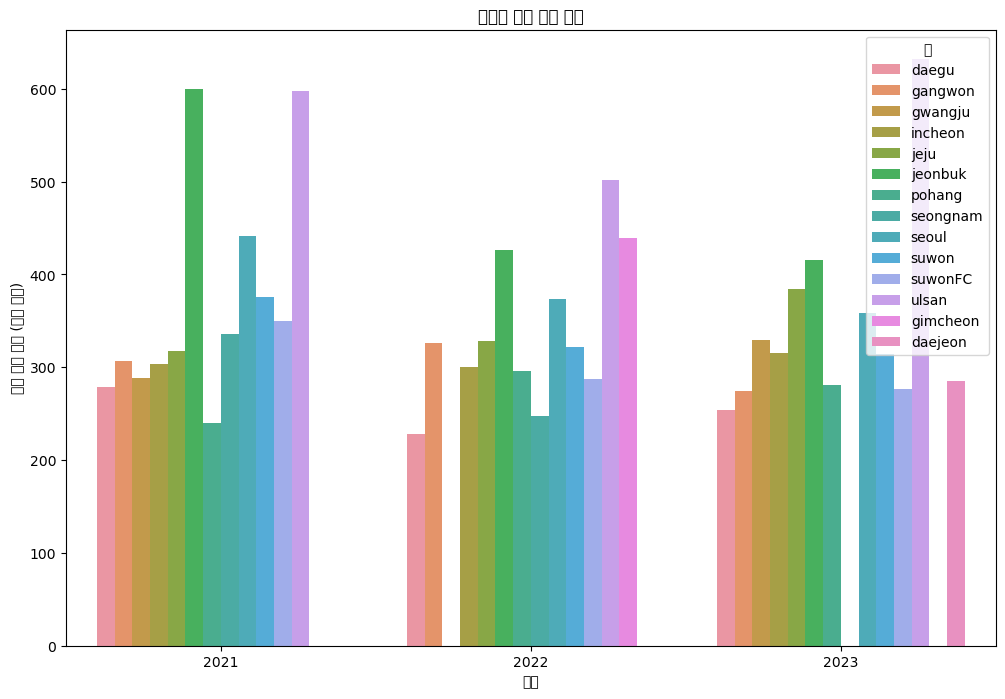

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시즌별 구단 평균 가치 데이터 추출
season_team_avg_value = df.groupby(['시즌', '기준'])['평균 가치'].mean().reset_index()

# Seaborn을 사용한 시즌별 구단 평균 가치 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='평균 가치', hue='기준', data=season_team_avg_value)
plt.title('시즌별 구단 평균 가치')
plt.xlabel('시즌')
plt.ylabel('구단 평균 가치 (백만 유로)')
plt.legend(title='팀', loc='upper right')
plt.show()


In [ ]:
str(df['평균 가치'].values).replace('€', '').replace('k','')